In [1]:
import benchmax.evaluation as ev
import pandas
import matplotlib.pyplot as plt
import tikzplotlib

stats = ev.csv_to_pandas('stats_smtrat_24-01-03_10:40.csv')

/home/jnalbach/.local/lib/python3.10/site-packages/benchmax/evaluation/load.py:92: DtypeWarning: Columns (272,273,274,275,276,277,278,280,467,468,469,470,471,472,473,475,1445,1640) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, header=[0,1], index_col=0)
/home/jnalbach/.local/lib/python3.10/site-packages/benchmax/evaluation/load.py:89: FutureWarning: inplace is deprecated and will be removed in a future version.
  df.columns.set_levels(map(lambda x: name_map[x] if x in name_map else x, df.columns.levels[0]) , level=0, inplace=True)


# General

In [2]:
ev.inspect_answer(stats)


smtrat-CoveringNG_PPDefault-development  \
count                                                 12134   
sat                                                    5184   
unsat                                                  5048   
unknown                                                   0   
wrong                                                     0   
error                                                     0   
timeout                                                1454   
memout                                                  445   
no answer                                                 0   
segmentation fault                                        0   
segfault                                                  3   
abort                                                     0   
invalid                                                   0   
parsererror                                               0   
nosuchfile                                                0   
solved                                                10232   

                    smtrat-CoveringNG_PPBooleanExploration-development  \
count                                                           12134    
sat                                                              5169    
unsat                                                            4547    
unknown                                                             0    
wrong                                                               0    
error                                                               0    
timeout                                                          2090    
memout                                                            327    
no answer                                                           0    
segmentation fault                                                  0    
segfault                                                            1    
abort                                                               0    
invalid                                                             0    
parsererror                                                         0    
nosuchfile                                                          0    
solved                                                           9716    

                    smtrat-CoveringNG_PPBooleanOff-development  \
count                                                    12134   
sat                                                       5153   
unsat                                                     4738   
unknown                                                      0   
wrong                                                        0   
error                                                        0   
timeout                                                   1801   
memout                                                     413   
no answer                                                    0   
segmentation fault                                           0   
segfault                                                    29   
abort                                                        0   
invalid                                                      0   
parsererror                                                  0   
nosuchfile                                                   0   
solved                                                    9891   

                    smtrat-CoveringNG_PPBooleanPartialPropagationSotd-development  \
count                                                           12134               
sat                                                              5184               
unsat                                                            5052               
unknown                                                             0               
wrong                                                               0               
error                                                   

In [3]:
results = ev.inspect_answer(stats)
results.loc['memout'] = results.loc['memout'] + results.loc['segfault']
results=results.drop(['invalid','abort','segfault','segmentation fault','no answer','error','wrong','unknown','count'])
results = results[[
    'smtrat-CoveringNG_PPBooleanExploration-development', 'smtrat-CoveringNG_PPBooleanOff-development', 'smtrat-CoveringNG_PPDefault-development',
    'smtrat-CoveringNG_PPImplicantsSotdReverse-development', 'smtrat-CoveringNG_PPImplicantsSizeOnly-development', 'smtrat-CoveringNG_PPImplicantsPickeringTotal-development', 'smtrat-CoveringNG_PPDefault-development',
    'smtrat-CoveringNG_PPVarorderPickering-development', 'smtrat-CoveringNG_PPDefault-development',
    'smtrat-CoveringNG_PPInprocessingOn-development', 'smtrat-CoveringNG_PPDefault-development',
]]
results.columns=pandas.MultiIndex.from_tuples([
    ('Boolean reasoning', 'Exploration'), ('Boolean reasoning', 'Off'), ('Boolean reasoning', 'Propagation'),
    ('Implicant choice', 'Sotd reverse'), ('Implicant choice', 'Size'), ('Implicant choice', 'Feature based'), ('Implicant choice', 'Sotd'),
    ('Variable ordering', 'Feature based'), ('Variable ordering', 'Univariate'),
    ('Inprocessing', 'Gröbner'), ('Inprocessing', 'Off'),
])
results

Boolean reasoning                   Implicant choice         \
                  Exploration   Off Propagation     Sotd reverse   Size   
sat                      5169  5153        5184             5164   5169   
unsat                    4547  4738        5048             4985   5025   
timeout                  2090  1801        1454             1538   1491   
memout                    328   442         448              447    449   
parsererror                 0     0           0                0      0   
nosuchfile                  0     0           0                0      0   
solved                   9716  9891       10232            10149  10194   

                                 Variable ordering            Inprocessing  \
            Feature based   Sotd     Feature based Univariate      Gröbner   
sat                  5174   5184              5233       5184         5161   
unsat                5046   5048              4588       5048         5047   
timeout              1471   1454              1944       1454         1484   
memout                443    448               369        448          442   
parsererror             0      0                 0          0            0   
nosuchfile              0      0                 0          0            0   
solved              10220  10232              9821      10232        10208   

                    
               Off  
sat           5184  
unsat         5048  
timeout       1454  
memout         448  
parsererror      0  
nosuchfile       0  
solved       10232

In [4]:
#results.to_latex('results.tex')

(9400.0, 10300.0)

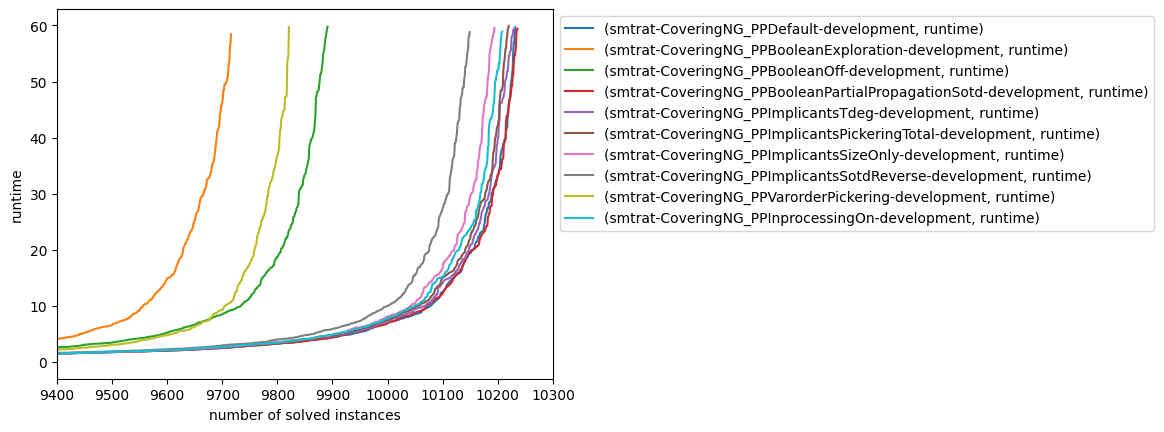

In [5]:
plot = ev.performance_profile(stats,ev.get_solvers(stats))
plot.axes.legend(bbox_to_anchor=(1,1))
plot.set_xlim(9400,10300)


# Boolean reasoning

(9400.0, 10300.0)

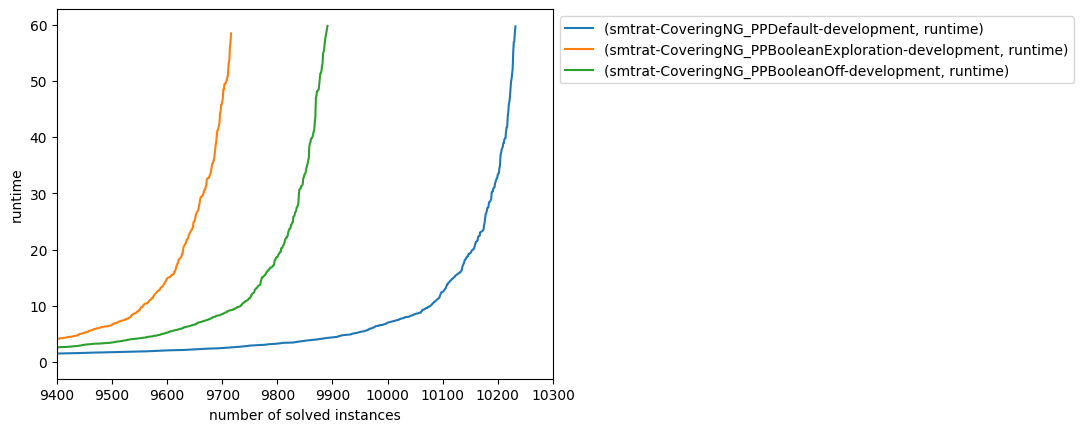

In [6]:
plot = ev.performance_profile(stats,['smtrat-CoveringNG_PPDefault-development',
       'smtrat-CoveringNG_PPBooleanExploration-development',
       'smtrat-CoveringNG_PPBooleanOff-development',
       ])
plot.axes.legend(bbox_to_anchor=(1,1))
plot.set_xlim(9400,10300)

In [7]:
ev.unique_solved_instances(stats,['smtrat-CoveringNG_PPBooleanOff-development', 'smtrat-CoveringNG_PPDefault-development', 'smtrat-CoveringNG_PPBooleanExploration-development'])

num. unique instances  \
()                                                                   1887   
(smtrat-CoveringNG_PPBooleanOff-development,)                          11   
(smtrat-CoveringNG_PPDefault-development,)                            207   
(smtrat-CoveringNG_PPBooleanExploration-develop...                      2   
(smtrat-CoveringNG_PPBooleanOff-development, sm...                    313   
(smtrat-CoveringNG_PPBooleanOff-development, sm...                      2   
(smtrat-CoveringNG_PPDefault-development, smtra...                    147   
(smtrat-CoveringNG_PPBooleanOff-development, sm...                   9565   

                                                    rel. unique instances  
()                                                               0.155513  
(smtrat-CoveringNG_PPBooleanOff-development,)                    0.000907  
(smtrat-CoveringNG_PPDefault-development,)                       0.017060  
(smtrat-CoveringNG_PPBooleanExploration-develop...               0.000165  
(smtrat-CoveringNG_PPBooleanOff-development, sm...               0.025795  
(smtrat-CoveringNG_PPBooleanOff-development, sm...               0.000165  
(smtrat-CoveringNG_PPDefault-development, smtra...               0.012115  
(smtrat-CoveringNG_PPBooleanOff-development, sm...               0.788281

In [8]:
ev.unique_solved_instances(stats,['smtrat-CoveringNG_PPBooleanOff-development', 'smtrat-CoveringNG_PPDefault-development'])

num. unique instances  \
()                                                                   1889   
(smtrat-CoveringNG_PPBooleanOff-development,)                          13   
(smtrat-CoveringNG_PPDefault-development,)                            354   
(smtrat-CoveringNG_PPBooleanOff-development, sm...                   9878   

                                                    rel. unique instances  
()                                                               0.155678  
(smtrat-CoveringNG_PPBooleanOff-development,)                    0.001071  
(smtrat-CoveringNG_PPDefault-development,)                       0.029174  
(smtrat-CoveringNG_PPBooleanOff-development, sm...               0.814076

In [9]:
ev.unique_solved_instances(stats,['smtrat-CoveringNG_PPDefault-development', 'smtrat-CoveringNG_PPBooleanExploration-development'])

num. unique instances  \
()                                                                   1898   
(smtrat-CoveringNG_PPDefault-development,)                            520   
(smtrat-CoveringNG_PPBooleanExploration-develop...                      4   
(smtrat-CoveringNG_PPDefault-development, smtra...                   9712   

                                                    rel. unique instances  
()                                                               0.156420  
(smtrat-CoveringNG_PPDefault-development,)                       0.042855  
(smtrat-CoveringNG_PPBooleanExploration-develop...               0.000330  
(smtrat-CoveringNG_PPDefault-development, smtra...               0.800396

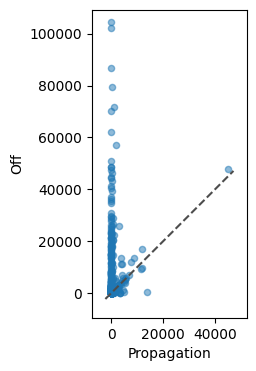

In [10]:
plt.rcParams["figure.figsize"] = (2,4)
ax = ev.scatter_plot(stats, 'smtrat-CoveringNG_PPDefault-development', 'smtrat-CoveringNG_PPBooleanOff-development', 'smtrat-coveringng_implicants.used.num', True)
ax.set_xlabel('Propagation')
ax.set_ylabel('Off')
ev.scatter_equal_line(ax)
ev.scatter_axis_equal(ax)
#ev.save_scatter(ax, 'boolean_propagation_off.tex', 6)
#tikzplotlib.save('boolean_propagation_off.tex')

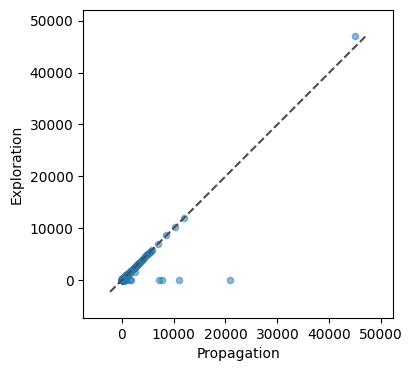

In [11]:
plt.rcParams["figure.figsize"] = (4,4)

ax = ev.scatter_plot(stats, 'smtrat-CoveringNG_PPDefault-development', 'smtrat-CoveringNG_PPBooleanExploration-development', 'smtrat-coveringng_implicants.used.num', True)
ax.set_xlabel('Propagation')
ax.set_ylabel('Exploration')
ev.scatter_equal_line(ax)
ev.scatter_axis_equal(ax)

#ev.save_scatter(ax, 'boolean_propagation_exploration.tex', 6)
#tikzplotlib.save('boolean_propagation_exploration.tex')


In [12]:
stats1 = ev.filter(stats, solved_by=['smtrat-CoveringNG_PPBooleanExploration-development'])

exploration_ratio = ((stats1[('smtrat-CoveringNG_PPBooleanExploration-development', 'smtrat-coveringng_formula_evaluation.overall_ms')] / 1000) / stats1[('smtrat-CoveringNG_PPBooleanExploration-development', 'runtime')])

stats1[(exploration_ratio > 0.8)].shape[0]


114

In [13]:
stats1 = ev.filter(stats, solved_by=['smtrat-CoveringNG_PPDefault-development'])

exploration_ratio = ((stats1[('smtrat-CoveringNG_PPDefault-development', 'smtrat-coveringng_formula_evaluation.overall_ms')] / 1000) / stats1[('smtrat-CoveringNG_PPDefault-development', 'runtime')])

stats1[(exploration_ratio > 0.8)].shape[0]


1

# Implicants

(9400.0, 10300.0)

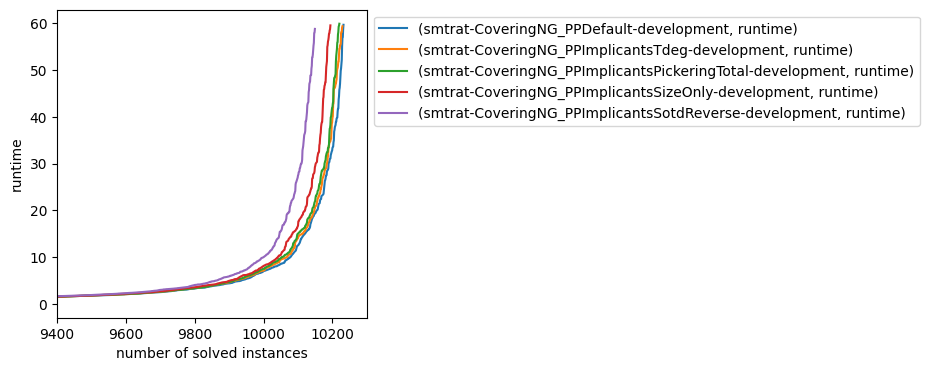

In [14]:
plot = ev.performance_profile(stats,['smtrat-CoveringNG_PPDefault-development',
        'smtrat-CoveringNG_PPImplicantsTdeg-development',
       'smtrat-CoveringNG_PPImplicantsPickeringTotal-development',
       'smtrat-CoveringNG_PPImplicantsSizeOnly-development',
       'smtrat-CoveringNG_PPImplicantsSotdReverse-development',])
plot.axes.legend(bbox_to_anchor=(1,1))
plot.set_xlim(9400,10300)

In [15]:
ev.unique_solved_instances(stats,[
    'smtrat-CoveringNG_PPDefault-development',
       ##'smtrat-CoveringNG_PPImplicantsTdeg-development',
       'smtrat-CoveringNG_PPImplicantsPickeringTotal-development',
       'smtrat-CoveringNG_PPImplicantsSizeOnly-development',
       #'smtrat-CoveringNG_PPImplicantsSotdReverse-development'
       ])

num. unique instances  \
()                                                                   1884   
(smtrat-CoveringNG_PPDefault-development,)                             14   
(smtrat-CoveringNG_PPImplicantsPickeringTotal-d...                      4   
(smtrat-CoveringNG_PPImplicantsSizeOnly-develop...                     11   
(smtrat-CoveringNG_PPDefault-development, smtra...                     38   
(smtrat-CoveringNG_PPDefault-development, smtra...                      5   
(smtrat-CoveringNG_PPImplicantsPickeringTotal-d...                      3   
(smtrat-CoveringNG_PPDefault-development, smtra...                  10175   

                                                    rel. unique instances  
()                                                               0.155266  
(smtrat-CoveringNG_PPDefault-development,)                       0.001154  
(smtrat-CoveringNG_PPImplicantsPickeringTotal-d...               0.000330  
(smtrat-CoveringNG_PPImplicantsSizeOnly-develop...               0.000907  
(smtrat-CoveringNG_PPDefault-development, smtra...               0.003132  
(smtrat-CoveringNG_PPDefault-development, smtra...               0.000412  
(smtrat-CoveringNG_PPImplicantsPickeringTotal-d...               0.000247  
(smtrat-CoveringNG_PPDefault-development, smtra...               0.838553

In [16]:
stats1 = stats.join(ev.virtual_best(stats,['smtrat-CoveringNG_PPDefault-development',
       'smtrat-CoveringNG_PPImplicantsPickeringTotal-development',
       'smtrat-CoveringNG_PPImplicantsSizeOnly-development'],'VB-implicant'))

ev.inspect_answer(stats1)[['smtrat-CoveringNG_PPDefault-development',
       'smtrat-CoveringNG_PPImplicantsPickeringTotal-development',
       'smtrat-CoveringNG_PPImplicantsSizeOnly-development','VB-implicant']]

smtrat-CoveringNG_PPDefault-development  \
count                                                 12134   
sat                                                    5184   
unsat                                                  5048   
unknown                                                   0   
wrong                                                     0   
error                                                     0   
timeout                                                1454   
memout                                                  445   
no answer                                                 0   
segmentation fault                                        0   
segfault                                                  3   
abort                                                     0   
invalid                                                   0   
parsererror                                               0   
nosuchfile                                                0   
solved                                                10232   

                    smtrat-CoveringNG_PPImplicantsPickeringTotal-development  \
count                                                           12134          
sat                                                              5174          
unsat                                                            5046          
unknown                                                             0          
wrong                                                               0          
error                                                               0          
timeout                                                          1471          
memout                                                            442          
no answer                                                           0          
segmentation fault                                                  0          
segfault                                                            1          
abort                                                               0          
invalid                                                             0          
parsererror                                                         0          
nosuchfile                                                          0          
solved                                                          10220          

                    smtrat-CoveringNG_PPImplicantsSizeOnly-development  \
count                                                           12134    
sat                                                              5169    
unsat                                                            5025    
unknown                                                             0    
wrong                                                               0    
error                                                               0    
timeout                                                          1491    
memout                                                            448    
no answer                                                           0    
segmentation fault                                                  0    
segfault                                                            1    
abort                                                               0    
invalid                                                             0    
parsererror                                                         0    
nosuchfile                                                          0    
solved                                                          10194    

                    VB-implicant  
count                      12134  
sat                         5189  
unsat                       5061  
unknown                        0  
wrong                          0  
error                          0  
timeout                     1454  
memout                       426  
no answer    

(9500.0, 10500.0)

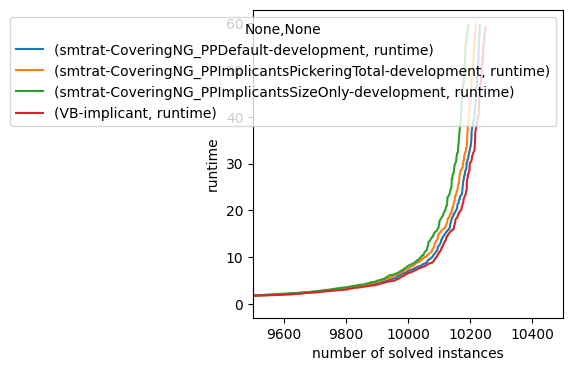

In [17]:
ax = ev.performance_profile(stats1,['smtrat-CoveringNG_PPDefault-development',
       'smtrat-CoveringNG_PPImplicantsPickeringTotal-development',
       'smtrat-CoveringNG_PPImplicantsSizeOnly-development','VB-implicant'])
ax.set_xlim(9500,10500)

In [18]:
(stats[('smtrat-CoveringNG_PPDefault-development', 'smtrat-coveringng_implicants.used.num')] / stats[('smtrat-CoveringNG_PPDefault-development', 'smtrat-coveringng_implicants.found.num')]).mean()

0.7726559949256776

# Varorder

(9400.0, 10300.0)

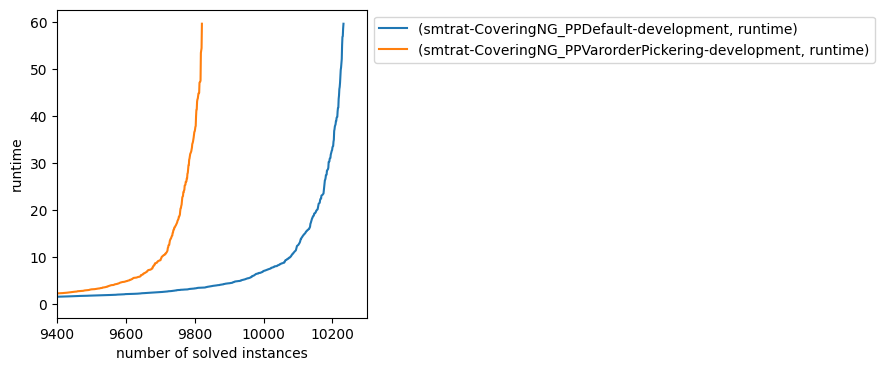

In [19]:
plot = ev.performance_profile(stats,['smtrat-CoveringNG_PPDefault-development','smtrat-CoveringNG_PPVarorderPickering-development'])
plot.axes.legend(bbox_to_anchor=(1,1))
plot.set_xlim(9400,10300)

<AxesSubplot:xlabel='smtrat-CoveringNG_PPDefault-development', ylabel='smtrat-CoveringNG_PPVarorderPickering-development'>

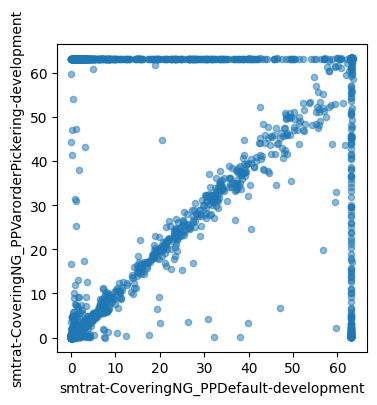

In [20]:
ev.scatter_plot(stats, 'smtrat-CoveringNG_PPDefault-development', 'smtrat-CoveringNG_PPVarorderPickering-development', 'runtime')

In [21]:
ev.unique_solved_instances(stats,['smtrat-CoveringNG_PPDefault-development','smtrat-CoveringNG_PPVarorderPickering-development'])

num. unique instances  \
()                                                                   1780   
(smtrat-CoveringNG_PPDefault-development,)                            533   
(smtrat-CoveringNG_PPVarorderPickering-developm...                    122   
(smtrat-CoveringNG_PPDefault-development, smtra...                   9699   

                                                    rel. unique instances  
()                                                               0.146695  
(smtrat-CoveringNG_PPDefault-development,)                       0.043926  
(smtrat-CoveringNG_PPVarorderPickering-developm...               0.010054  
(smtrat-CoveringNG_PPDefault-development, smtra...               0.799324

# PP

(9400.0, 10300.0)

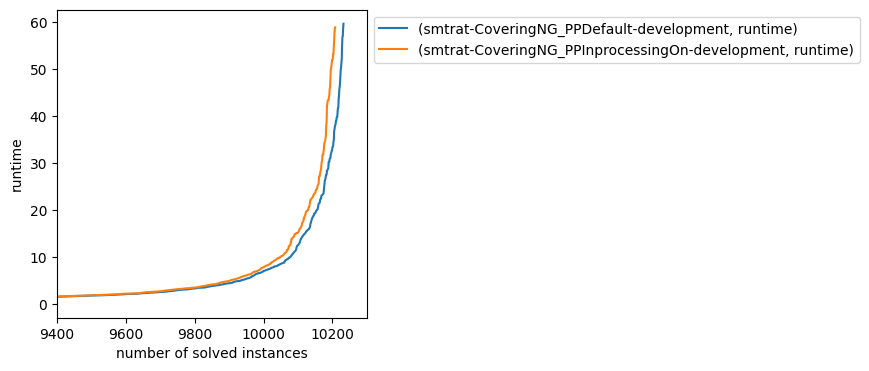

In [22]:
plot = ev.performance_profile(stats,['smtrat-CoveringNG_PPDefault-development','smtrat-CoveringNG_PPInprocessingOn-development'])
plot.axes.legend(bbox_to_anchor=(1,1))
plot.set_xlim(9400,10300)

In [23]:
ev.unique_solved_instances(stats,['smtrat-CoveringNG_PPDefault-development','smtrat-CoveringNG_PPInprocessingOn-development'])

num. unique instances  \
()                                                                   1898   
(smtrat-CoveringNG_PPDefault-development,)                             28   
(smtrat-CoveringNG_PPInprocessingOn-development,)                       4   
(smtrat-CoveringNG_PPDefault-development, smtra...                  10204   

                                                    rel. unique instances  
()                                                               0.156420  
(smtrat-CoveringNG_PPDefault-development,)                       0.002308  
(smtrat-CoveringNG_PPInprocessingOn-development,)                0.000330  
(smtrat-CoveringNG_PPDefault-development, smtra...               0.840943

<AxesSubplot:xlabel='smtrat-CoveringNG_PPDefault-development', ylabel='smtrat-CoveringNG_PPInprocessingOn-development'>

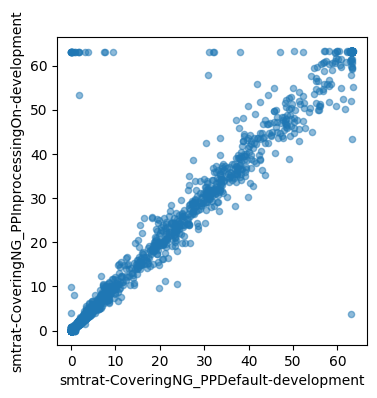

In [24]:
ev.scatter_plot(stats,'smtrat-CoveringNG_PPDefault-development','smtrat-CoveringNG_PPInprocessingOn-development','runtime')